# Resampling Datetime Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [2]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

## Load Data

In [3]:
df = pd.read_csv('Data\london_weather_MODIFIED.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Convert the date column to datetime dtype

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

## Set the date column as the index.

In [6]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


## Filter out only the required data:

- Keep only data from the year 2000 or later.
- Keep only the following features:
     - precipitation
     - mean_temp
     - min_temp
     - max_temp
     - snow_depth


In [7]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,NaN
2020-12-28,0.20,1.10,-1.30,3.60,NaN
2020-12-29,0.00,2.60,1.10,4.10,NaN


## Impute any missing values. 

In [8]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [9]:
# Use Interpolate for temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()

In [10]:
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [11]:
# Fill preciptation & snow null values with 0 
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [12]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Answer the Questions with Visualizations 

## Q1: What month had the most precipitation between 2000 through 2010?

In [13]:
dfq1 = df
dfq1

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,0.00
2020-12-28,0.20,1.10,-1.30,3.60,0.00
2020-12-29,0.00,2.60,1.10,4.10,0.00


In [14]:
dfq1 = dfq1.loc[:'2010', ['precipitation']]

dfq1

,precipitation
date,
2000-01-01,0.00
2000-01-02,0.20
2000-01-03,6.00
2000-01-04,0.20
2000-01-05,0.80
...,...
2010-12-27,5.00
2010-12-28,0.40
2010-12-29,1.40


In [15]:
dfq1.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=4018, freq=None)

In [19]:
dfq1_MS = dfq1.resample("MS").max()
dfq1_MS.name = 'Resampled'
dfq1_MS

,precipitation
date,
2000-01-01,6.00
2000-02-01,16.80
2000-03-01,7.20
2000-04-01,17.20
2000-05-01,19.00
...,...
2010-08-01,20.60
2010-09-01,9.80
2010-10-01,21.80


In [58]:
max_pre = dfq1_MS['precipitation'].max()
max_pre

36.6

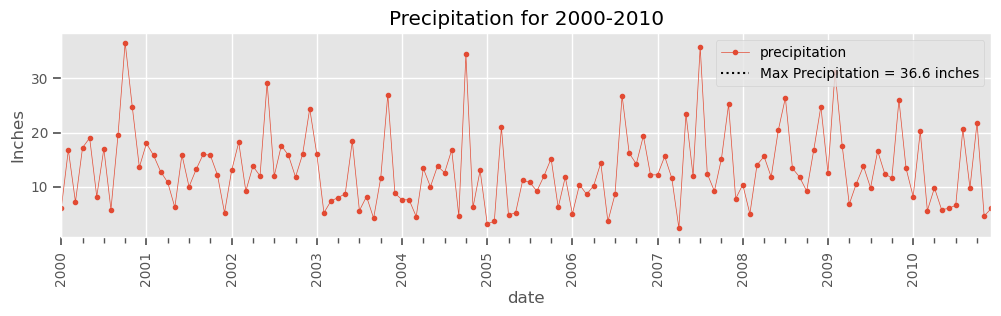

In [63]:
fig, ax = plt.subplots(figsize=(12,3))
dfq1_MS.plot(ax=ax, title='Precipitation for 2000-2010',ylabel='Inches', marker='.', lw=.5)
fig.autofmt_xdate(which='major',rotation=90,ha='center')
ax.axvline(max_pre, color='k', ls=':', label=f"Max Precipitation = {max_pre} inches")
ax.legend()

## Which year between 2000-2020 had the coolest average temperature?

In [64]:
dfq2 = df
dfq2

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,0.00
2020-12-28,0.20,1.10,-1.30,3.60,0.00
2020-12-29,0.00,2.60,1.10,4.10,0.00


In [66]:
dfq2 = dfq2.loc['2000':, ['mean_temp']]
dfq2

,mean_temp
date,
2000-01-01,7.00
2000-01-02,7.90
2000-01-03,9.40
2000-01-04,7.00
2000-01-05,6.40
...,...
2020-12-27,7.50
2020-12-28,1.10
2020-12-29,2.60


In [67]:
dfq2.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [75]:
dfq2_Y = dfq2.resample("AS").mean()
dfq2_Y.name = 'Resampled'
dfq2_Y

,mean_temp
date,
2000-01-01,11.58
2001-01-01,11.33
2002-01-01,12.08
2003-01-01,12.11
2004-01-01,11.90
2005-01-01,11.82
2006-01-01,12.29
2007-01-01,11.94
2008-01-01,11.33


In [88]:
coolest_temp = dfq2_Y['mean_temp'].min()
coolest_temp = round(coolest_temp, 2)
coolest_temp

10.66

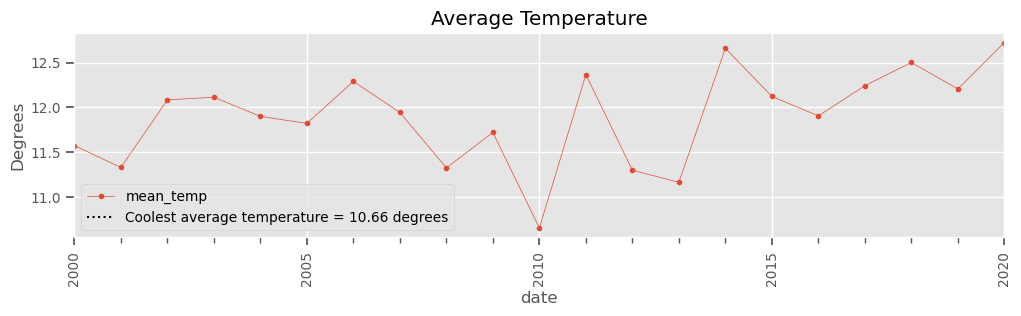

In [89]:
fig, ax = plt.subplots(figsize=(12,3))
dfq2_Y.plot(ax=ax, title='Average Temperature',ylabel='Degrees', marker='.', lw=.5)
fig.autofmt_xdate(which='major',rotation=90,ha='center')
ax.axvline(coolest_temp, color='k', ls=':', label=f"Coolest average temperature = {coolest_temp} degrees")
ax.legend()